In [1]:
import numpy
import pylab
import pandas
import matplotlib.pyplot as plt
import math
from pandas import Series

In [14]:
Germ_total_confirmed = numpy.loadtxt(open("E:/Germany_Data/Germany_total_confirmded.csv","rb"),delimiter=",",skiprows=0)
Germ_total_vaccinated = numpy.loadtxt(open("E:/Germany_Data/Germany_total_vaccinated.csv","rb"),delimiter=",",skiprows=0)
Germ_new_vaccinated = numpy.loadtxt(open("E:/Germany_Data/Germany_new_vaccinated.csv","rb"),delimiter=",",skiprows=0)
Germ_new_confirmed = numpy.loadtxt(open("E:/Germany_Data/Germany_new_confirmded.csv","rb"),delimiter=",",skiprows=0)


In [15]:
print(len(Germ_new_confirmed))
print(len(Germ_total_confirmed))
print(len(Germ_new_vaccinated))
print(len(Germ_total_vaccinated))

478
478
478
478


In [16]:
# Germ_new_confirmed

76020254.89999995

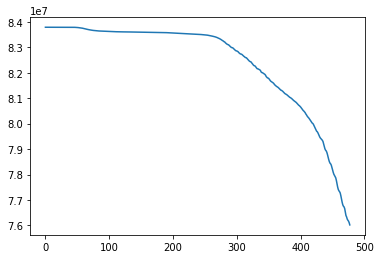

In [20]:
# 总人口
total_person = 83783945
# 疫苗作用率
# immune_rate = 0.4
# 传播率
# beta  = 0.02  
#疫苗在人群中的作用率
alpha = 0.1
# 每日新增
Germ_new_confirmed = list(Germ_new_confirmed)
# 总共确诊
Germ_total_confirmed = list(Germ_total_confirmed)
# 总共接种
Germ_total_vaccinated = list(Germ_total_vaccinated)
# 当日接种
Germ_new_vaccinated = list(Germ_new_vaccinated)

# 分别将total_confirmed ,new_confirmed,total_vaccinated 转化成int
new_confirmed = []
for i in Germ_new_confirmed:
    i = int(i)
    new_confirmed.append(i)
    
total_vaccinated = []
for i in Germ_total_vaccinated:
    i = int(i)
    total_vaccinated.append(i)
    
total_confirmed = []
for i in Germ_total_confirmed:
    i = int(i)
    total_confirmed.append(i)

new_vaccinated = []
for i in Germ_new_vaccinated:
    i = int(i)*alpha
    new_vaccinated.append(i)
# # 每日新增人数与疫苗人数之和
I_add_V = list(map(lambda x:(x[0]+x[1]),zip(new_confirmed,new_vaccinated))) 

Suspectible = []
for i in I_add_V:
    total_person = total_person - i
    Suspectible.append(total_person)
    
# # pylab.xlim(300,410)   
plot1 = pylab.plot(Suspectible, label='Suspectible')
Suspectible[-1]
# plot2 = pylab.plot(I_add_V)

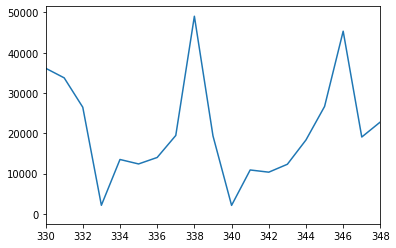

In [21]:
pylab.xlim(330,348)
plot1 = pylab.plot(new_confirmed)



 AIR of turning point =  0.021225917499994765


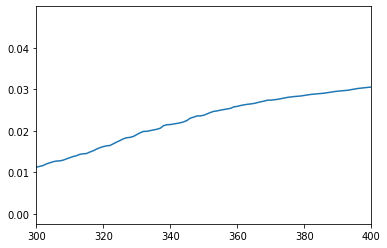

In [22]:
beta = list(map(lambda x:(x[0]/x[1]),zip(total_confirmed,Suspectible))) 
pylab.xlim(300,400) 
# UK_beta_pd= pandas.DataFrame(beta) 
# UK_beta_pd.to_csv('E:/uk_beta.csv',index=False,mode='a',header=None)
# print(len(beta))
# print(len(Suspectible))
print(" AIR of turning point = ",(beta[338]))
plot2 = pylab.plot(beta, label='beta') 

In [28]:
Germ_beta_pd= pandas.DataFrame(beta) 
Germ_beta_pd.to_csv('E:/Germany_Data/beta.csv',index=False,mode='a',header=None)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
D:\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters


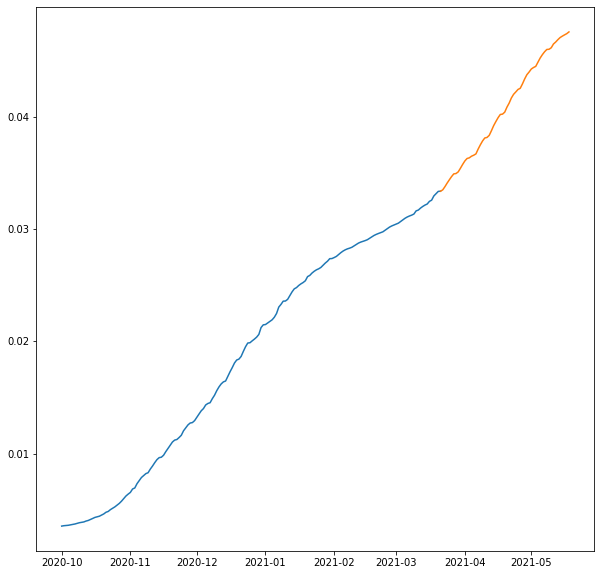

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
Germ_beta = pd.read_csv('E:/Germany_Data/beta.csv',index_col = 'Date',parse_dates=['Date'])
 
#ChinaBank.index = pd.to_datetime(ChinaBank.index)
sub = Germ_beta['2020/10':'2021/5']['Beta']
train = sub.ix['2020/10/01':'2021/3/21']
# print(type(train))
test = sub.ix['2021/3/21':'2021/5/18']
plt.figure(figsize=(10,10))
# print(train)
plt.plot(train)
plt.plot(test)
plt.show()

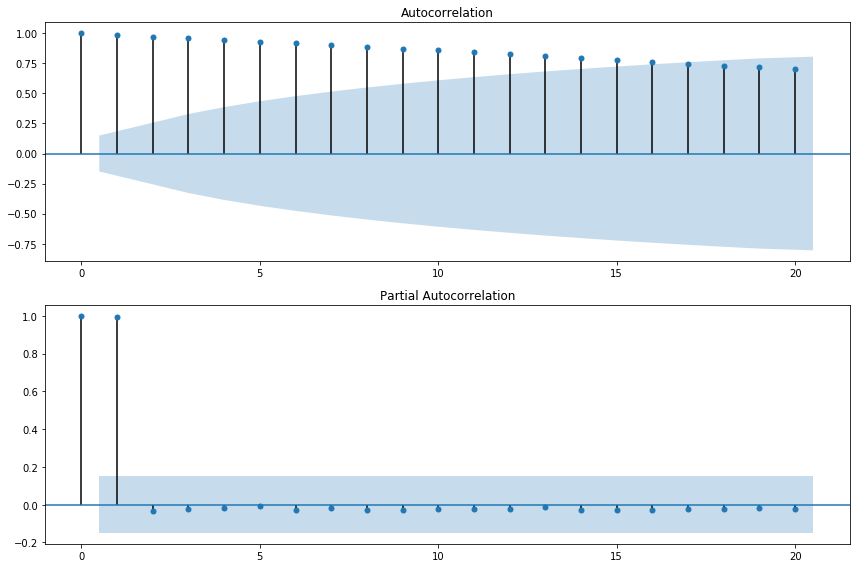

In [33]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
 
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train, lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarnin

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: 

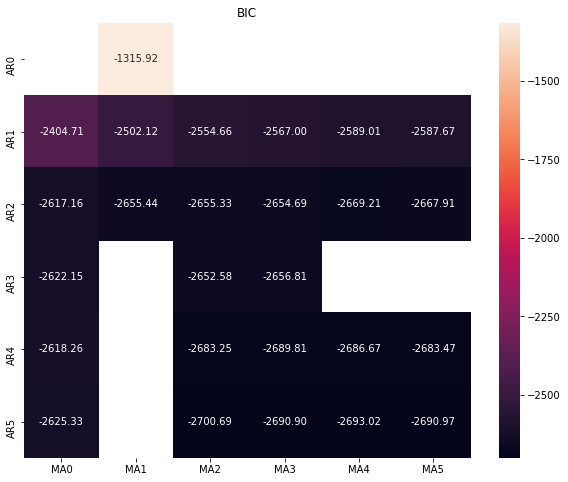

In [34]:
import itertools
import numpy as np
import seaborn as sns
 
p_min = 0
d_min = 0
q_min = 0
p_max = 5
d_max = 0
q_max = 5
 
# Initialize a DataFrame to store the results,，以BIC准则
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])
 
for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
 
    try:
        model = sm.tsa.ARIMA(train, order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)
 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 )
ax.set_title('BIC')
plt.show()

In [35]:
train_results = sm.tsa.arma_order_select_ic(train, ic=['aic', 'bic'], trend='nc', max_ar=8, max_ma=8)
 
print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: He

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: He

AIC (8, 0)
BIC (8, 0)


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<Figure size 864x576 with 0 Axes>

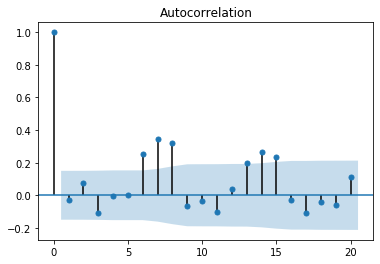

In [36]:
model = sm.tsa.ARIMA(train, order=(1, 1, 0))
results = model.fit()
resid = results.resid #赋值
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=20)
plt.show()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2020-10-01    3.714288
2020-10-02    0.003541
2020-10-03    0.003609
2020-10-04    0.003615
2020-10-05    0.003633
2020-10-06    0.003688
2020-10-07    0.003709
2020-10-08    0.003776
2020-10-09    0.003842
2020-10-10    0.003895
2020-10-11    0.003913
2020-10-12    0.003946
2020-10-13    0.004066
2020-10-14    0.004095
2020-10-15    0.004215
2020-10-16    0.004310
2020-10-17    0.004405
2020-10-18    0.004431
2020-10-19    0.004471
2020-10-20    0.004621
2020-10-21    0.004723
2020-10-22    0.004917
2020-10-23    0.004915
2020-10-24    0.005168
2020-10-25    0.005253
2020-10-26    0.005371
2020-10-27    0.005552
2020-10-28    0.005717
2020-10-29    0.005948
2020-10-30    0.006203
                ...   
2021-04-19    0.040278
2021-04-20    0.040595
2021-04-21    0.041282
2021-04-22    0.041563
2021-04-23    0.042125
2021-04-24    0.042322
2021-04-25    0.042434
2021-04-26    0.042661
2021-04-27    0.042646
2021-04-28    0.043312
2021-04-29    0.043790
2021-04-30    0.044120
2021-05-01 

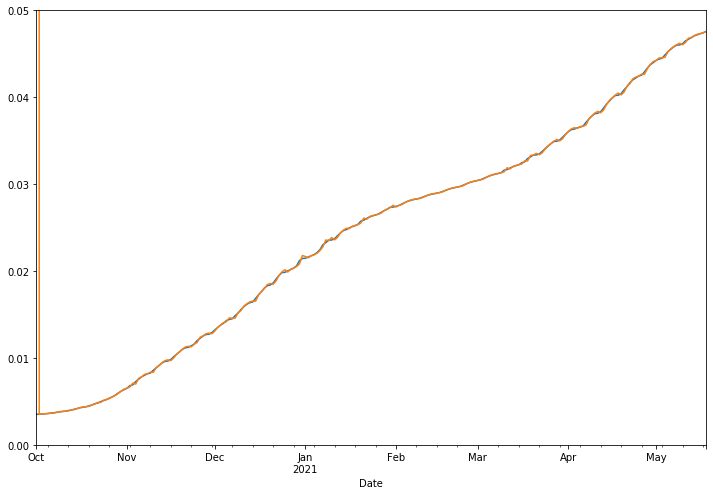

In [58]:
model = sm.tsa.ARIMA(sub, order=(4,0,0))
results = model.fit()
predict_sunspots = results.predict()
predict_beta = results.predict()
print(predict_beta)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sub.plot(ax=ax)
predict_sunspots.plot(ax=ax)
plt.ylim(0,0.05)
plt.show()

In [46]:
predict_beta_df = predict_beta.to_frame()
type(predict_beta_df)
predict_beta_df.to_csv('E:/Germany_Data/beta_predict.csv',index=False,mode='a',header=None)

In [55]:
total_cases_predict = list(map(lambda x:(x[0]*x[1]),zip(predict_beta,Suspectible))) 

In [49]:
total_cases_predict = pandas.DataFrame(total_cases_predict)
total_cases_predict.to_csv('E:/Germany_Data/total_confirmed_predict.csv',index=False,mode='a',header=None)
# new_cases_predict = list(Series(total_cases_predict).diff(1))

In [61]:
new_cases_predict[2:]

[2855.1891410935787,
 1664.870691432734,
 1557.1209309039405,
 3122.5327104746248,
 2472.0377025431953,
 4039.7187547187787,
 4840.19780889363,
 4588.762225987448,
 2991.0026238473947,
 2868.1714682067395,
 6592.790040512395,
 4499.863377103931,
 7231.726219562057,
 7683.732086668897,
 7760.821558512456,
 4904.292283491755,
 4042.3232220314676,
 8472.230899575574,
 8601.17436629301,
 12447.108058769838,
 6009.318522954534,
 13609.107369946316,
 10564.31560648221,
 9992.909210763639,
 12694.186865364201,
 13305.725763069466,
 16385.87434456841,
 18953.594432681217,
 19619.117535697646,
 14231.666295358213,
 12718.801707321312,
 25590.825087426812,
 7636.880779295578,
 31929.96726177691,
 22898.330565164797,
 23173.479255819693,
 14345.684573560487,
 14745.183021751232,
 6628.952039528405,
 26995.450526841683,
 22793.354872897617,
 25184.277853650856,
 22673.391325569362,
 14918.937084593344,
 3259.747752400581,
 14856.585340681602,
 26745.142569562653,
 24202.04589529778,
 24530.2427048

In [65]:
predict_cases_df =pandas.DataFrame(new_cases_predict)
# type(predict_beta_df)
predict_cases_df.to_csv('E:/Germany_Data/cases_predict.csv',index=False,mode='a',header=None)

In [2]:
Germany_SI = numpy.loadtxt(open("E:/Germany_Data/strigency_index.csv","rb"),delimiter=",",skiprows=0)

In [3]:
population_denisty = 237.016
PSI = []
for i in Germany_SI:
    psi = population_denisty/i
    PSI.append(psi)

In [4]:
Germany_PSI = pandas.DataFrame(PSI)
Germany_PSI.to_csv('E:/Germany_Data/Germany_PSI.csv',index=False,mode='a',header=None)

In [11]:
AIR_PSI = list(map(lambda x:(x[0]/x[1]),zip(beta,PSI))) 

In [12]:
AIR_PSI

[3.021431729660302e-10,
 1.208572735138739e-09,
 1.208572735138739e-09,
 1.208572735138739e-09,
 1.5107159369545158e-09,
 2.4171455856764705e-09,
 3.021432054219963e-09,
 3.6257185516132104e-09,
 3.6257185516132104e-09,
 3.6257185516132104e-09,
 3.6257185516132104e-09,
 3.927861811128492e-09,
 3.927861811128492e-09,
 4.230005077856214e-09,
 4.230005077856214e-09,
 4.834291632948975e-09,
 8.862867993739787e-09,
 8.862867993739787e-09,
 8.862867993739787e-09,
 8.862867993739787e-09,
 8.862867993739787e-09,
 8.862867993739787e-09,
 8.862867993739787e-09,
 8.862867993739787e-09,
 8.862867993739787e-09,
 8.862867993739787e-09,
 8.862867993739787e-09,
 8.862867993739787e-09,
 8.862867993739787e-09,
 9.416797355742362e-09,
 2.3113959904671277e-08,
 3.937934802705295e-08,
 4.592578805367294e-08,
 9.945555369105345e-08,
 1.6366113734147542e-07,
 2.001702295715835e-07,
 2.4675083221382247e-07,
 3.2984065799280117e-07,
 6.068076893634859e-07,
 8.434897596469723e-07,
 1.005894560640055e-06,
 1.309

In [13]:
Germany_AIR_PSI = pandas.DataFrame(AIR_PSI)
Germany_AIR_PSI.to_csv('E:/Germany_Data/Germany_AIR_PSI.csv',index=False,mode='a',header=None)